In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

folder_path = os.path.join('project_data', 'allowances')
krbn_plots = os.path.join('plots', 'krbn')

ticker = "KRBN"
print(f"Downloading {ticker}...")

try:
    krbn = yf.download(ticker, period="max", progress=False)

    print(f"Downloaded {len(krbn)} records from {krbn.index[0].date()} to {krbn.index[-1].date()}")

    file_path = os.path.join(folder_path, f'{ticker}_data.csv')
    krbn.to_csv(file_path)

except Exception as e:
    print(f"Error: {e}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\2879898865.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  krbn = yf.download(ticker, period="max", progress=False)


Downloaded 1237 records from 2020-07-31 to 2025-07-03


In [36]:
print(f"Columns: {list(krbn.columns)}")
print(f"Shape: {krbn.shape}")

Columns: [('Close', 'KRBN'), ('High', 'KRBN'), ('Low', 'KRBN'), ('Open', 'KRBN'), ('Volume', 'KRBN')]
Shape: (1237, 5)


In [37]:
print("First 5 rows:")
print(krbn.head())

print("\nLast 5 rows:")
print(krbn.tail())

print("\nMissing values:")
print(krbn.isnull().sum())

price_col = "Close"

print(f"\nPrice statistics:")
print(krbn[price_col].describe())

First 5 rows:
Price           Close       High        Low       Open Volume
Ticker           KRBN       KRBN       KRBN       KRBN   KRBN
Date                                                         
2020-07-31  14.327861  14.476282  14.327861  14.476282   9900
2020-08-03  14.388355  14.388355  14.244155  14.244155   5100
2020-08-04  14.556470  14.645100  14.279324  14.349665   1600
2020-08-05  14.652134  14.701373  14.560691  14.560691  11000
2020-08-06  14.460103  14.785785  14.420009  14.778751   2900

Last 5 rows:
Price           Close       High        Low       Open Volume
Ticker           KRBN       KRBN       KRBN       KRBN   KRBN
Date                                                         
2025-06-27  30.170000  30.209999  29.973000  30.209999  18400
2025-06-30  29.690001  29.771000  29.530001  29.700001  21100
2025-07-01  30.100000  30.150000  29.900000  29.990000  11700
2025-07-02  30.379999  30.650000  30.219999  30.219999  40100
2025-07-03  30.480000  30.686001  30.45999

Plot saved to plots\krbn\KRBN_price_plot.png


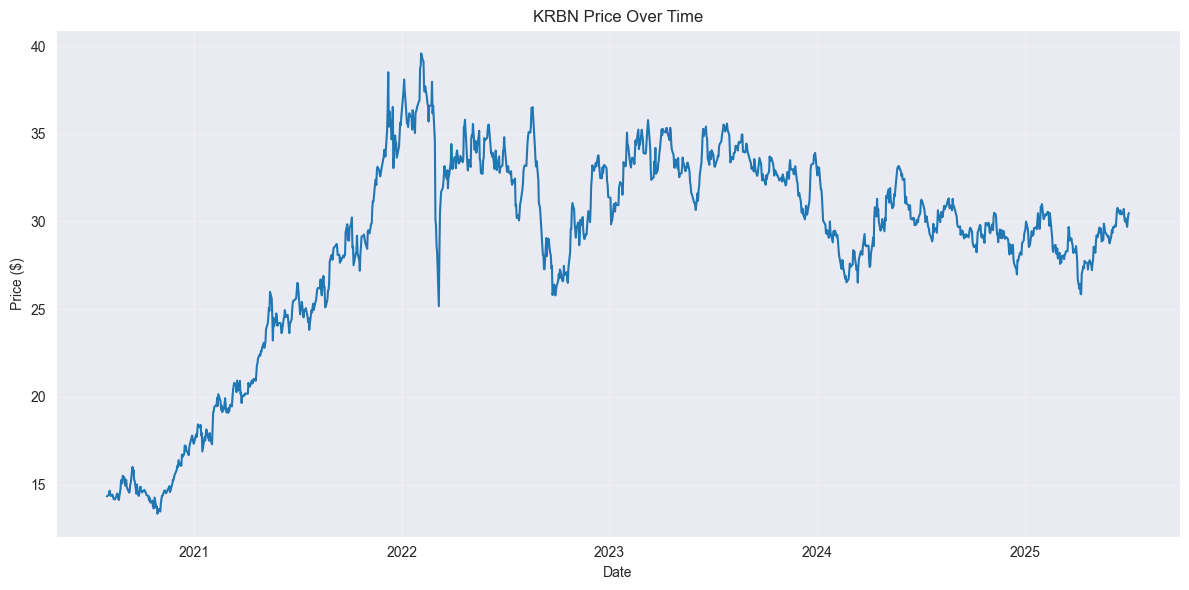

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(krbn.index, krbn[price_col])
plt.title(f'{ticker} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, f'{ticker}_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

**TODO** The considerable price rise through 2021 represents the EU ETS Phase IV implementation combined with post-COVID economic recovery.

It reflects the Market Stability Reserve (MSR) mechanism finally working as intended, removing surplus allowances from circulation.
https://www.eib.org/attachments/lucalli/20240297_economics_working_paper_2024_05_en.pdf

https://www.homaio.com/post/what-is-the-market-stability-reserve-in-the-eu-ets

The peak around $40 coincides with the Russia-Ukraine war when energy security concerns temporarily exceeded climate policy. The later decline sets a new equilibrium price that better reflects actual decarbonization costs rather than speculative premiums.

Volume plot saved to plots\krbn\KRBN_volume_plot.png


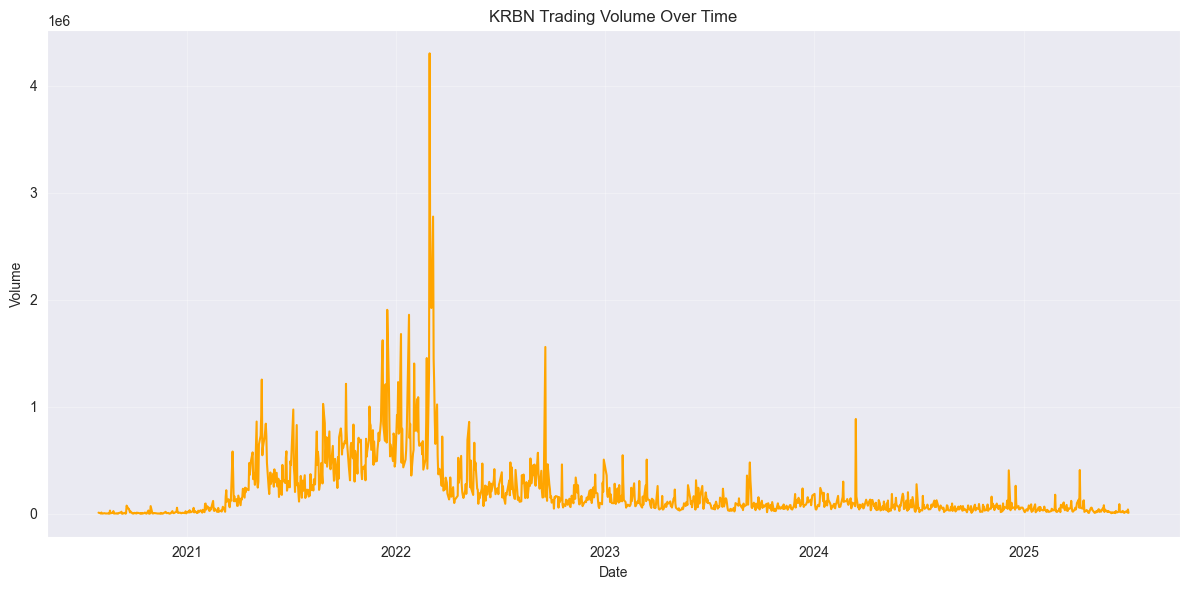

In [39]:
volume_col = 'Volume'

plt.figure(figsize=(12, 6))
plt.plot(krbn.index, krbn[volume_col], color='orange')
plt.title(f'KRBN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, f'KRBN_volume_plot.png')
plt.savefig(plot_path)
print(f"Volume plot saved to {plot_path}")

plt.show()

This extreme volume spike in early 2022 coincides with the Russia-Ukraine crisis and represents institutional repositioning rather than retail speculation. Financial institutions likely used carbon allowances as inflation hedges during this period.

https://kraneshares.com/kcca-targeted-carbon-exposure-to-california-and-an-inflation-hedge/

In [148]:
krbn_returns = krbn[price_col].pct_change().dropna()
krbn_volume = krbn['Volume'].dropna()

amihud_illiquidity = (abs(krbn_returns) / krbn_volume * 1e6)
avg_illiquidity = amihud_illiquidity.mean()

avg_daily_volume = krbn_volume.mean()
volume_volatility = krbn_volume.std() / krbn_volume.mean()  # Coefficient of variation

zero_return_days = (abs(krbn_returns) < 0.001).sum()
zero_return_pct = zero_return_days / len(krbn_returns) * 100

volume_trend = np.polyfit(range(len(krbn_volume)), krbn_volume, 1)[0]

print(f"Average Daily Volume: {avg_daily_volume['KRBN']:,.0f}")
print(f"Volume Volatility (CV): {volume_volatility['KRBN']:.2f}")
print(f"Amihud Illiquidity Ratio: {avg_illiquidity['KRBN']:.6f}")
print(f"Zero-return days: {zero_return_pct['KRBN']:.1f}%")
print(f"Volume trend (daily increase): {volume_trend[0]:,.0f}")
print()


if avg_illiquidity['KRBN'] > 1:
    print("HIGH illiquidity - still niche market characteristics")
elif avg_illiquidity['KRBN'] > 0.1:
    print("MODERATE illiquidity - transitioning market")
else:
    print("LOW illiquidity - mainstream market characteristics")

if zero_return_pct['KRBN'] > 5:
    print("High inactive trading days - limited institutional participation")
elif zero_return_pct['KRBN'] > 2:
    print("Moderate inactive days - growing but not mainstream")
else:
    print("Low inactive days - active institutional market")

if volume_trend[0] > 0:
    print(f"INCREASING volume trend - market mainstreaming (trend: +{volume_trend[0]:,.0f}/day)")
else:
    print(f"DECREASING volume trend - market consolidation")

Average Daily Volume: 203,187
Volume Volatility (CV): 1.49
Amihud Illiquidity Ratio: 0.875552
Zero-return days: 5.1%
Volume trend (daily increase): -252

MODERATE illiquidity - transitioning market
High inactive trading days - limited institutional participation
DECREASING volume trend - market consolidation


Plot saved to plots\krbn\KRBN_liquidity_analysis.png


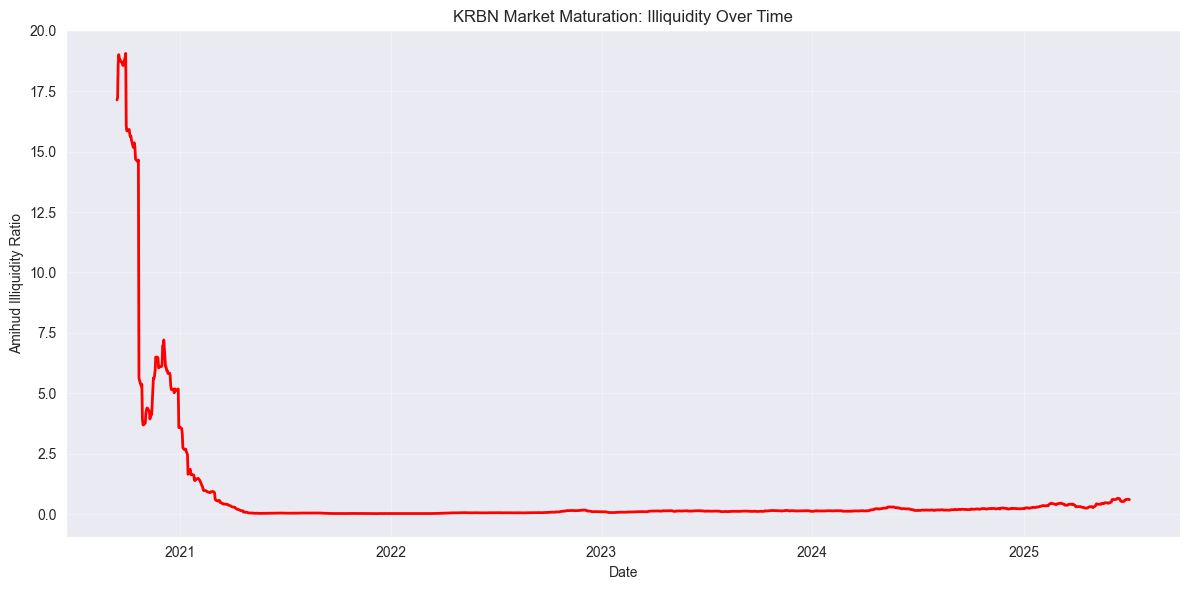

In [149]:
illiquidity_smooth = amihud_illiquidity.rolling(30).mean().dropna()


plt.figure(figsize=(12, 6))

plt.plot(illiquidity_smooth.index, illiquidity_smooth, color='red', linewidth=2)
plt.ylabel('Amihud Illiquidity Ratio')
plt.xlabel('Date')
plt.title('KRBN Market Maturation: Illiquidity Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_liquidity_analysis.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_volume_analysis.png


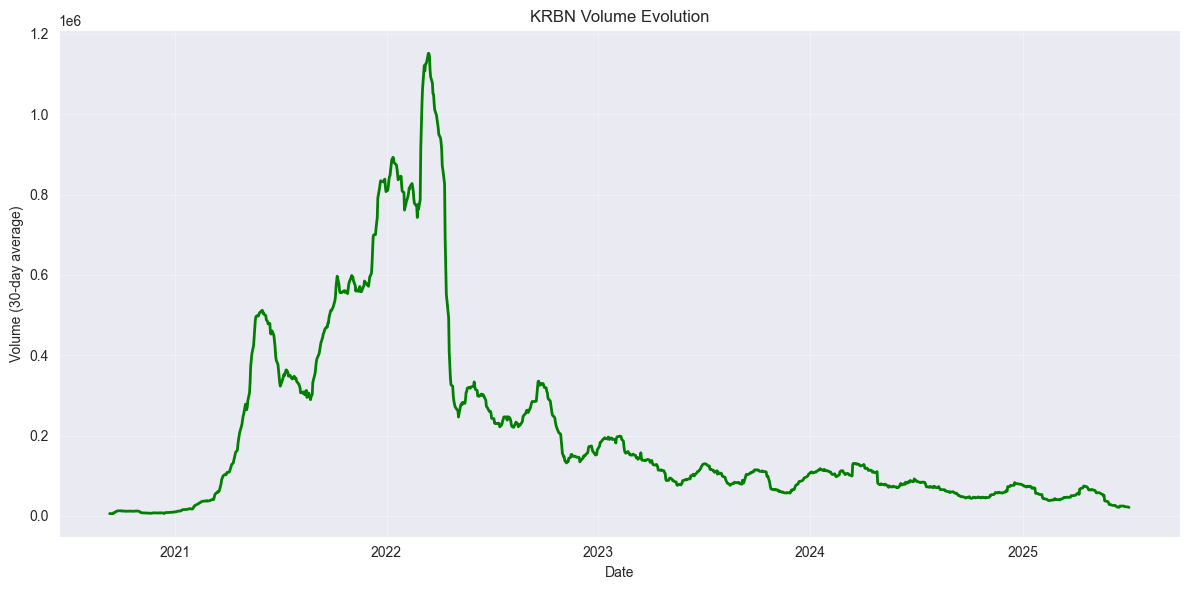

In [150]:
volume_smooth = krbn_volume.rolling(30).mean().dropna()


plt.figure(figsize=(12, 6))

plt.plot(volume_smooth.index, volume_smooth, color='green', linewidth=2)
plt.ylabel('Volume (30-day average)')
plt.xlabel('Date')
plt.title('KRBN Volume Evolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_volume_analysis.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [151]:
print(f"Illiquidity reduction: {illiquidity_smooth.iloc[0, 0]:.1f} => {illiquidity_smooth.iloc[-1, 0]:.1f}")
print(f"Volume peak vs current: {volume_smooth.max().iloc[0]:,.0f} vs {volume_smooth.iloc[-1, 0]:,.0f}")

Illiquidity reduction: 17.1 => 0.6
Volume peak vs current: 1,151,437 vs 21,123


Plot saved to plots\krbn\KRBN_price_distribution.png


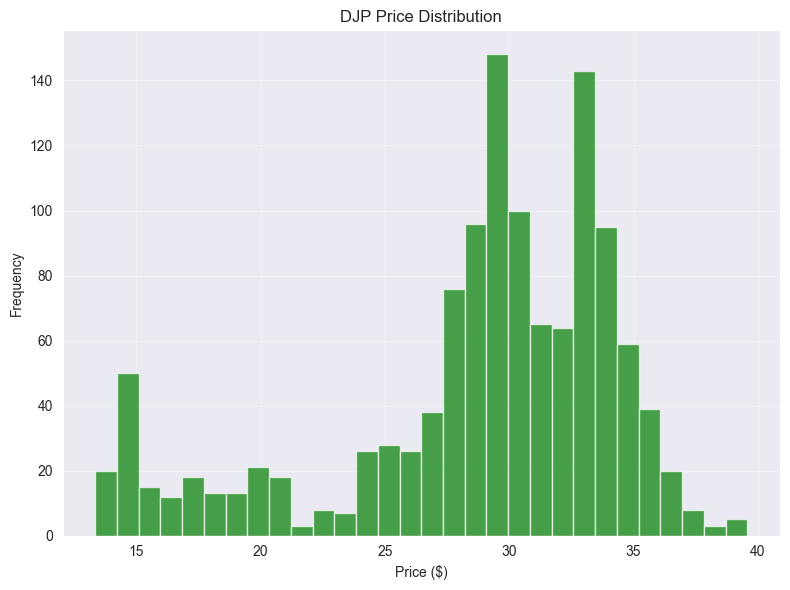

In [185]:
plt.figure(figsize=(8, 6))
plt.hist(krbn[price_col], bins=30, alpha=0.7, color='green')
plt.title(f'{ticker} Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_price_distribution.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_daily_price_range.png


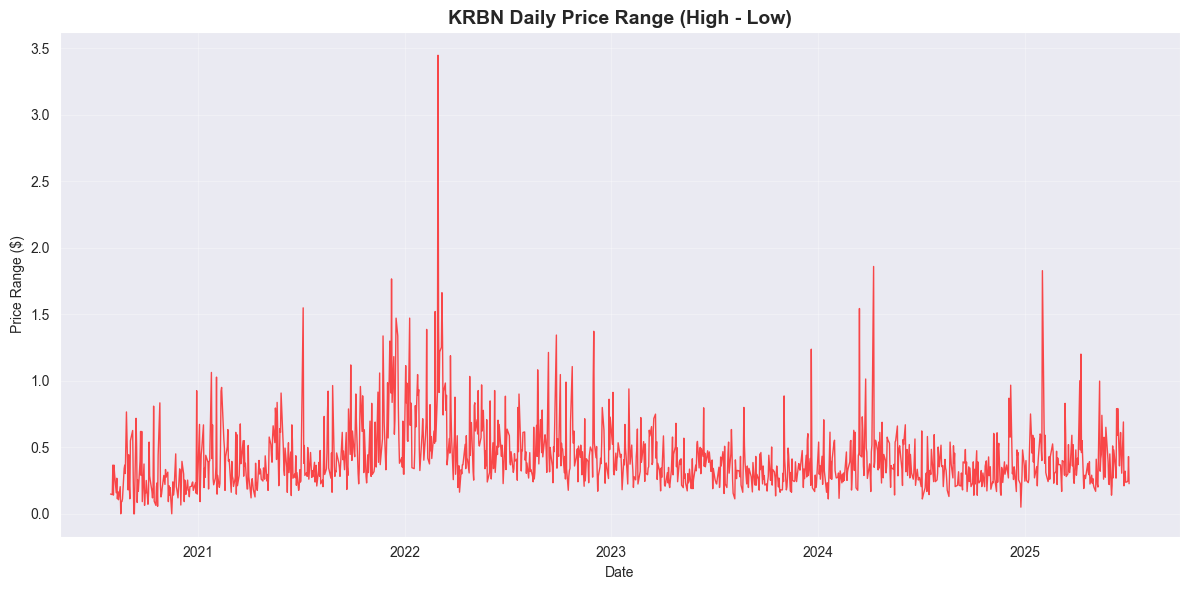

In [41]:
krbn_daily_range = krbn['High'] - krbn['Low']

plt.figure(figsize=(12, 6))

plt.plot(krbn.index, krbn_daily_range, linewidth=1, color='red', alpha=0.7)
plt.title('KRBN Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_daily_price_range.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [42]:
daily_returns = krbn[price_col].pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)

print(f"KRBN annual volatility: {annual_volatility['KRBN']:.1%}")

KRBN annual volatility: 30.1%


In [43]:
avg_daily_change = abs(daily_returns).mean()
print(f"Average daily price movement: {avg_daily_change['KRBN']:.2%}")

Average daily price movement: 1.37%


In [44]:
print("Downloading commodity and alternative benchmarks...")

benchmark_indices = ["GLD", "DBA", "USO", "TLT"]

gld = yf.download(benchmark_indices[0], period="max", progress=False)  # Gold
dba = yf.download(benchmark_indices[1], period="max", progress=False)  # Agriculture
uso = yf.download(benchmark_indices[2], period="max", progress=False)  # Oil
tlt = yf.download(benchmark_indices[3], period="max", progress=False)  # Long-term bonds

for ticker_new, data in [("GLD", gld), ("DBA", dba), ("USO", uso), ("TLT", tlt)]:
    data.to_csv(os.path.join(folder_path, f'{ticker_new}_data.csv'))
    print(f"{ticker_new}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gld = yf.download(benchmark_indices[0], period="max", progress=False)  # Gold
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dba = yf.download(benchmark_indices[1], period="max", progress=False)  # Agriculture
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  uso = yf.download(benchmark_indices[2], period="max", progress=False)  # Oil
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tlt = yf.download(benchmark_indices[3], period="max", progress=False)  # Long-term bonds


GLD: 5188 records from 2004-11-18 to 2025-07-03
DBA: 4653 records from 2007-01-05 to 2025-07-03
USO: 4839 records from 2006-04-10 to 2025-07-03
TLT: 5770 records from 2002-07-30 to 2025-07-03


In [45]:
common_start = max(krbn.index[0], gld.index[0], dba.index[0], uso.index[0], tlt.index[0])
common_end = min(krbn.index[-1], gld.index[-1], dba.index[-1], uso.index[-1], tlt.index[-1])

print(f"Comparing over common period: {common_start.date()} to {common_end.date()}")

krbn_common = krbn[common_start:common_end]
gld_common = gld[common_start:common_end]
dba_common = dba[common_start:common_end]
uso_common = uso[common_start:common_end]
tlt_common = tlt[common_start:common_end]

krbn_returns = krbn_common[price_col].pct_change().dropna()
gld_returns = gld_common[price_col].pct_change().dropna()
dba_returns = dba_common[price_col].pct_change().dropna()
uso_returns = uso_common[price_col].pct_change().dropna()
tlt_returns = tlt_common[price_col].pct_change().dropna()

krbn_vol = krbn_returns.std() * np.sqrt(252)
gld_vol = gld_returns.std() * np.sqrt(252)
dba_vol = dba_returns.std() * np.sqrt(252)
uso_vol = uso_returns.std() * np.sqrt(252)
tlt_vol = tlt_returns.std() * np.sqrt(252)

krbn_daily = abs(krbn_returns).mean()
gld_daily = abs(gld_returns).mean()
dba_daily = abs(dba_returns).mean()
uso_daily = abs(uso_returns).mean()
tlt_daily = abs(tlt_returns).mean()

print(f"Period: {len(krbn_returns)} trading days")
print()
print("Annual Volatility:")
print(f"KRBN (Carbon Allowances):     {krbn_vol['KRBN']:.2%}")
print(f"GLD (Gold):                   {gld_vol['GLD']:.2%}")
print(f"DBA (Agriculture):            {dba_vol['DBA']:.2%}")
print(f"USO (Oil):                    {uso_vol['USO']:.2%}")
print(f"TLT (Long Bonds):             {tlt_vol['TLT']:.2%}")
print()
print("Average Daily Movement:")
print(f"KRBN:  {krbn_daily['KRBN']:.2%}")
print(f"GLD:   {gld_daily['GLD']:.2%}")
print(f"DBA:   {dba_daily['DBA']:.2%}")
print(f"USO:   {uso_daily['USO']:.2%}")
print(f"TLT:   {tlt_daily['TLT']:.2%}")
print()
print(f"KRBN vs GLD: {krbn_vol['KRBN']/gld_vol['GLD']:.2f}x the volatility")
print(f"KRBN vs DBA: {krbn_vol['KRBN']/dba_vol['DBA']:.2f}x the volatility")
print(f"KRBN vs USO: {krbn_vol['KRBN']/uso_vol['USO']:.2f}x the volatility")

Comparing over common period: 2020-07-31 to 2025-07-03
Period: 1236 trading days

Annual Volatility:
KRBN (Carbon Allowances):     30.06%
GLD (Gold):                   15.45%
DBA (Agriculture):            14.40%
USO (Oil):                    33.84%
TLT (Long Bonds):             16.28%

Average Daily Movement:
KRBN:  1.37%
GLD:   0.73%
DBA:   0.69%
USO:   1.61%
TLT:   0.81%

KRBN vs GLD: 1.95x the volatility
KRBN vs DBA: 2.09x the volatility
KRBN vs USO: 0.89x the volatility


30% annual volatility is quite high. Higher than traditional "safe haven" assets (gold, bonds). Though, still comparable to many other stocks.

In [193]:
from hurst import compute_Hc


def interpret_hurst(hurst_value):
    if hurst_value > 0.55:
        return "TRENDING/PERSISTENT behavior"
    elif hurst_value < 0.45:
        return "MEAN-REVERTING behavior"
    else:
        return "RANDOM WALK behavior"


hurst_krbn, _, _ = compute_Hc(krbn_returns)
hurst_results = {}

for name, data in [("KRBN", krbn), ("SPY", spy), ("GLD", gld), ("USO", uso)]:
    returns = data[price_col].pct_change().dropna().values
    hurst_val, _, _ = compute_Hc(returns)
    hurst_results[name] = hurst_val
    print(f"{name}: {hurst_val:.3f} - {interpret_hurst(hurst_val)}")

KRBN: 0.284 - MEAN-REVERTING behavior
SPY: 0.284 - MEAN-REVERTING behavior
GLD: 0.278 - MEAN-REVERTING behavior
USO: 0.249 - MEAN-REVERTING behavior


In [184]:
other_hursts = [h for k, h in hurst_results.items() if h != 'KRBN']
avg_others = np.mean(other_hursts)
difference = abs(hurst_krbn - avg_others)

print(f"KRBN vs Traditional Assets Average: {hurst_krbn:.3f} vs {avg_others:.3f}")
print(f"Difference: {difference:.3f}")

if difference > 0.1:
    print("SIGNIFICANT difference - KRBN has unique market dynamics")
    print("Supports 'distinct asset class' hypothesis")
else:
    print("SIMILAR dynamics - KRBN behaving like traditional assets")
    print("Suggests market integration/mainstreaming")

KRBN vs Traditional Assets Average: 0.284 vs 0.274
Difference: 0.010
SIMILAR dynamics - KRBN behaving like traditional assets
Suggests market integration/mainstreaming


Plot saved to plots\krbn\carbon_comparison_price_plot.png


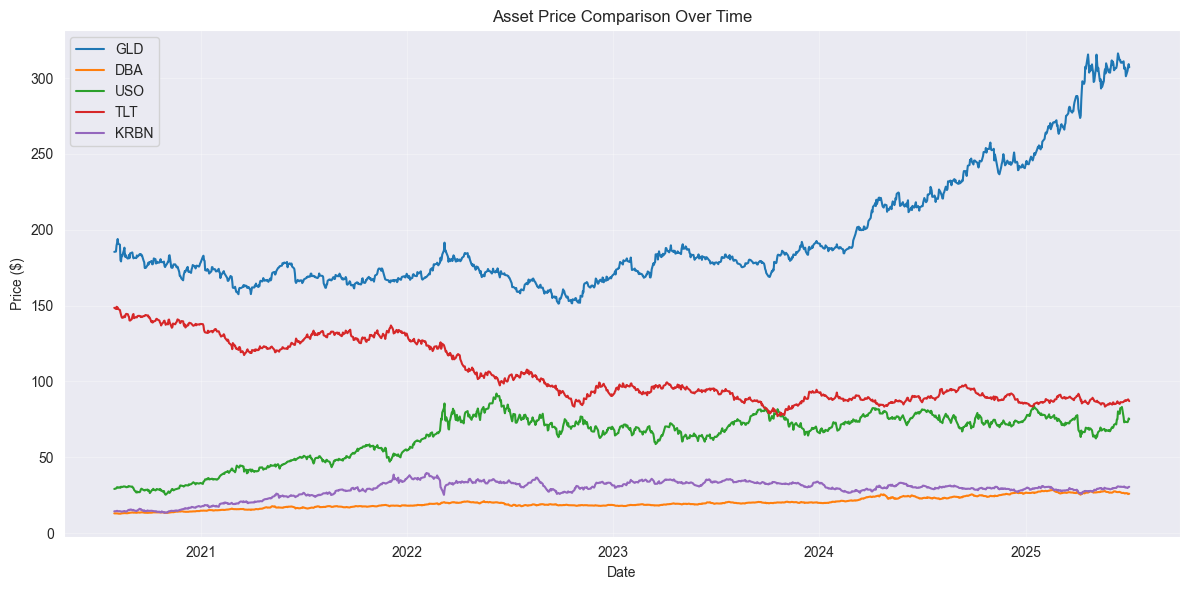

In [46]:
plt.figure(figsize=(12, 6))

plt.plot(gld_common.index, gld_common[price_col], label="GLD")
plt.plot(dba_common.index, dba_common[price_col], label="DBA")
plt.plot(uso_common.index, uso_common[price_col], label="USO")
plt.plot(tlt_common.index, tlt_common[price_col], label="TLT")
plt.plot(krbn.index, krbn[price_col], label=ticker)

plt.title("Asset Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\normalized_carbon_comparison_price_plot.png


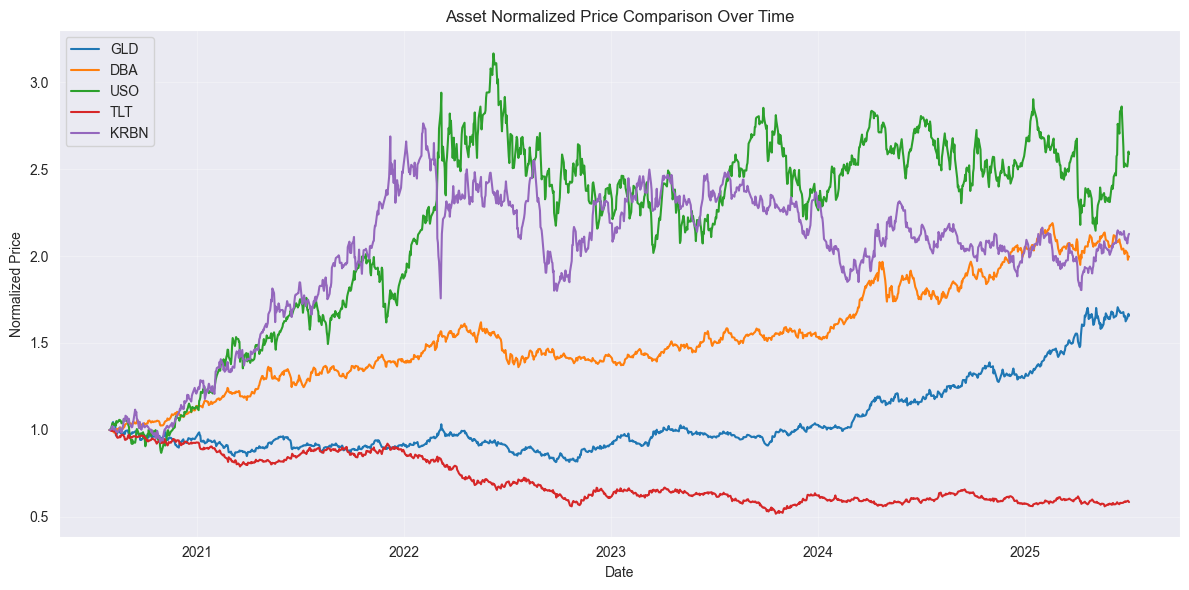

In [47]:
gld_norm = gld_common[price_col] / gld_common[price_col].iloc[0]
dba_norm = dba_common[price_col] / dba_common[price_col].iloc[0]
uso_norm = uso_common[price_col] / uso_common[price_col].iloc[0]
tlt_norm = tlt_common[price_col] / tlt_common[price_col].iloc[0]
krbn_norm = krbn[price_col] / krbn[price_col].iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(gld_common.index, gld_norm, label="GLD")
plt.plot(dba_common.index, dba_norm, label="DBA")
plt.plot(uso_common.index, uso_norm, label="USO")
plt.plot(tlt_common.index, tlt_norm, label="TLT")
plt.plot(krbn_common.index, krbn_norm, label=ticker)

plt.title("Asset Normalized Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'normalized_carbon_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [48]:
spy = yf.download("SPY", period="max", progress=False)  # S&P 500
agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market

for ticker_new, data in [("SPY", spy), ("AGG", agg)]:
    data.to_csv(os.path.join(folder_path, f'{ticker_new}_data.csv'))
    print(f"{ticker_new}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3781778841.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY", period="max", progress=False)  # S&P 500
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3781778841.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market


SPY: 8163 records from 1993-01-29 to 2025-07-03
AGG: 5476 records from 2003-09-29 to 2025-07-03


In [49]:
common_start_all = max(krbn.index[0], spy.index[0], agg.index[0], gld.index[0], uso.index[0])
common_end_all = min(krbn.index[-1], spy.index[-1], agg.index[-1], gld.index[-1], uso.index[-1])

asset_data = {}
for name, df in [("KRBN", krbn), ("SPY", spy), ("AGG", agg), ("GLD", gld), ("USO", uso)]:
    asset_data[name] = df[common_start_all:common_end_all][price_col]

asset_prices = pd.concat(asset_data.values(), axis=1)
asset_prices.columns = asset_data.keys()

print(f"Analysis period: {common_start_all.date()} to {common_end_all.date()}")
print(f"Total observations: {len(asset_prices)}")

Analysis period: 2020-07-31 to 2025-07-03
Total observations: 1237


Plot saved to plots\krbn\carbon_vs_traditional_assets_plot.png


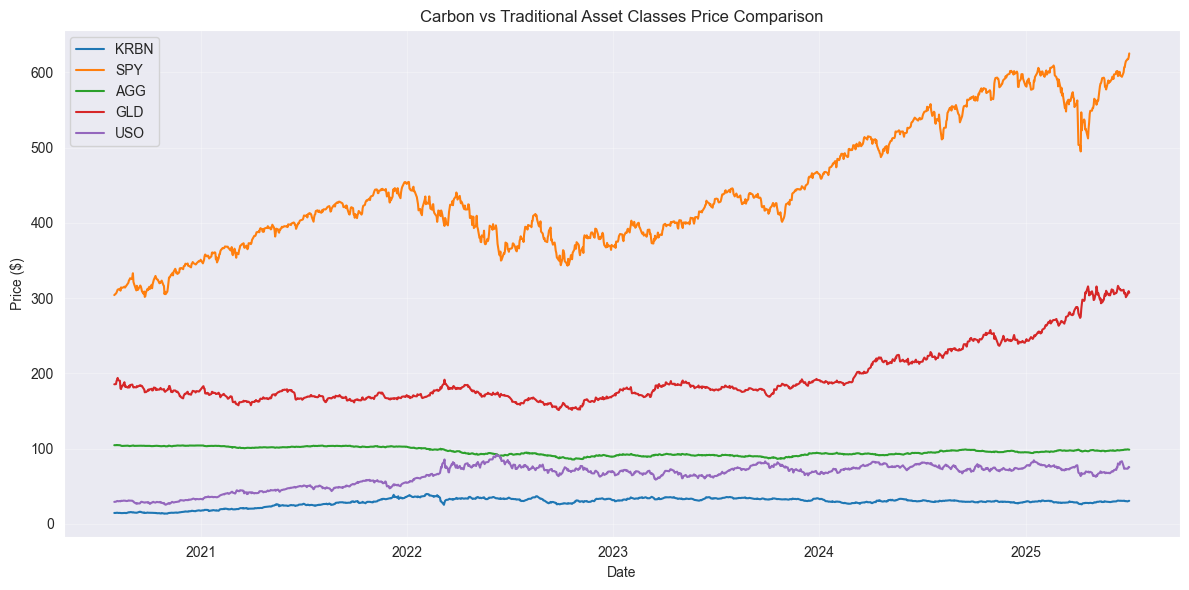

In [50]:
plt.figure(figsize=(12, 6))

plt.plot(asset_prices.index, asset_prices['KRBN'], label='KRBN')
plt.plot(asset_prices.index, asset_prices['SPY'], label='SPY')
plt.plot(asset_prices.index, asset_prices['AGG'], label='AGG')
plt.plot(asset_prices.index, asset_prices['GLD'], label='GLD')
plt.plot(asset_prices.index, asset_prices['USO'], label='USO')

plt.title("Carbon vs Traditional Asset Classes Price Comparison")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_traditional_assets_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\normalized_carbon_vs_traditional_assets_plot.png


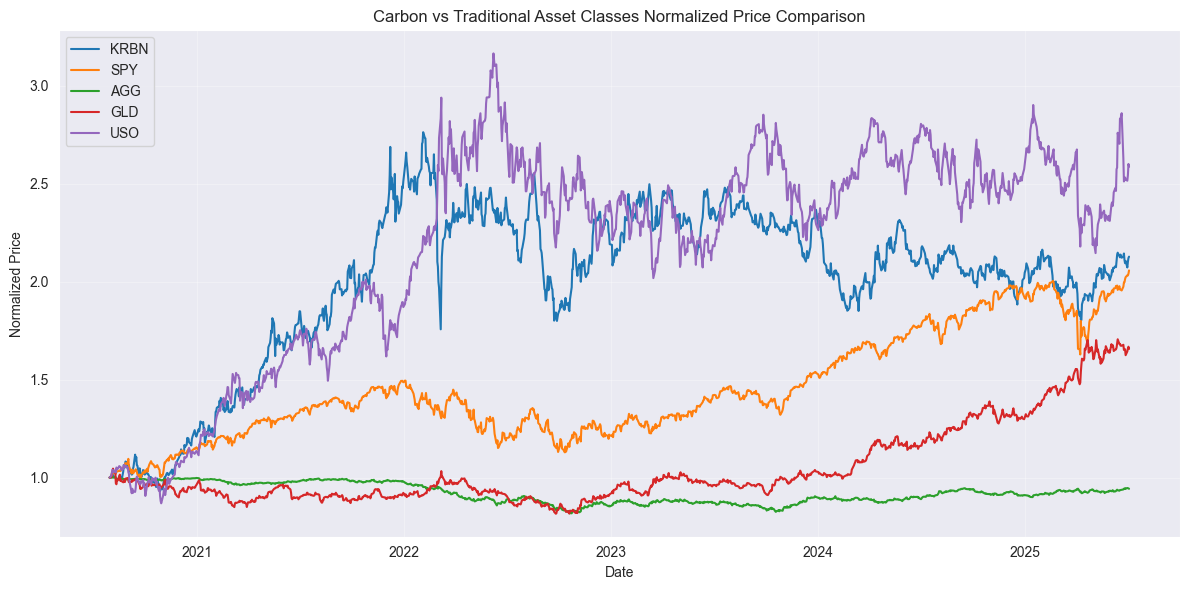

In [51]:
asset_norm = asset_prices / asset_prices.iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(asset_norm.index, asset_norm['KRBN'], label='KRBN')
plt.plot(asset_norm.index, asset_norm['SPY'], label='SPY')
plt.plot(asset_norm.index, asset_norm['AGG'], label='AGG')
plt.plot(asset_norm.index, asset_norm['GLD'], label='GLD')
plt.plot(asset_norm.index, asset_norm['USO'], label='USO')

plt.title("Carbon vs Traditional Asset Classes Normalized Price Comparison")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'normalized_carbon_vs_traditional_assets_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Normalized comparison reveals carbon allowances have near-zero correlation with gold, oil, and bonds, which is extraordinary and suggests that carbon markets operate on fundamentally different drivers. The opposite mirroring between KRBN and USO looks interesting. Potentially, it could reflect substitution dynamics: when oil prices rise, there's more incentive to switch to renewables. Maybe this is the spillover effect that Saulius was talking about?

Plot saved to plots\krbn\carbon_vs_assets_daily_returns_comparison_plot.png


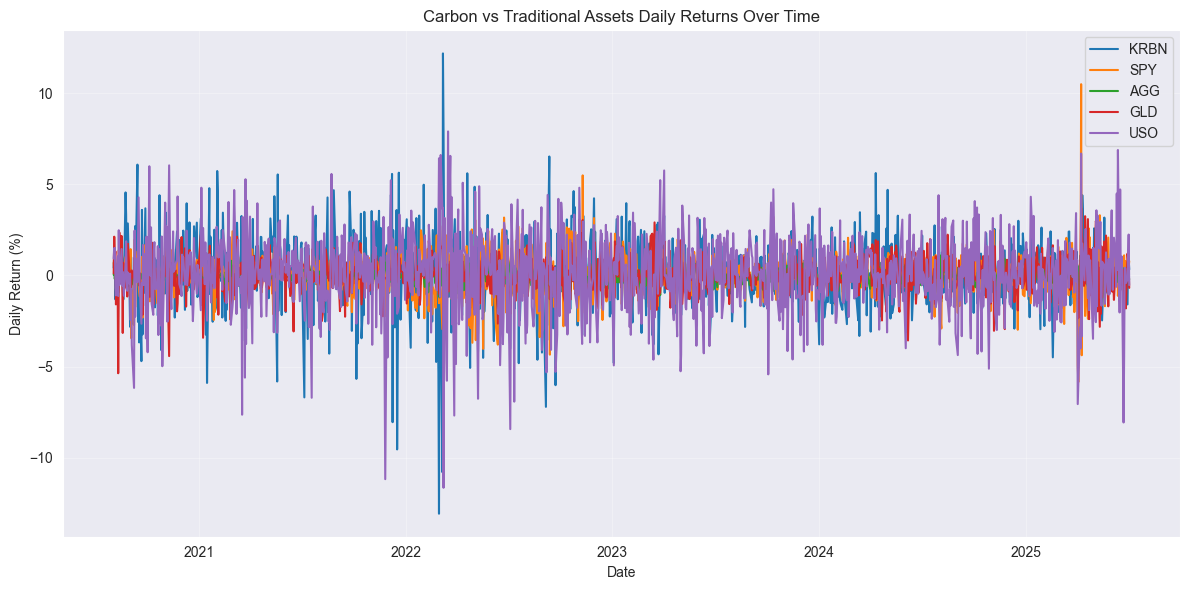

In [188]:
asset_returns = asset_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')
plt.plot(asset_returns.index, asset_returns['SPY'], label='SPY')
plt.plot(asset_returns.index, asset_returns['AGG'], label='AGG')
plt.plot(asset_returns.index, asset_returns['GLD'], label='GLD')
plt.plot(asset_returns.index, asset_returns['USO'], label='USO')

plt.title("Carbon vs Traditional Assets Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_assets_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_SPY_daily_returns_comparison_plot.png


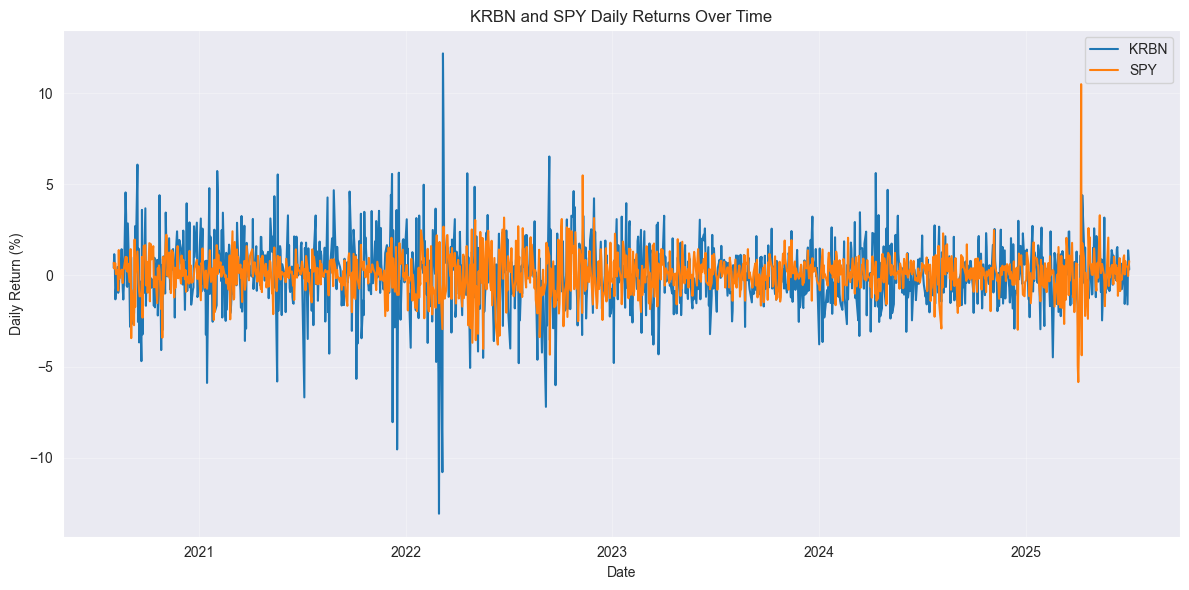

In [53]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')
plt.plot(asset_returns.index, asset_returns['SPY'], label='SPY')

plt.title("KRBN and SPY Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_SPY_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_daily_returns_plot.png


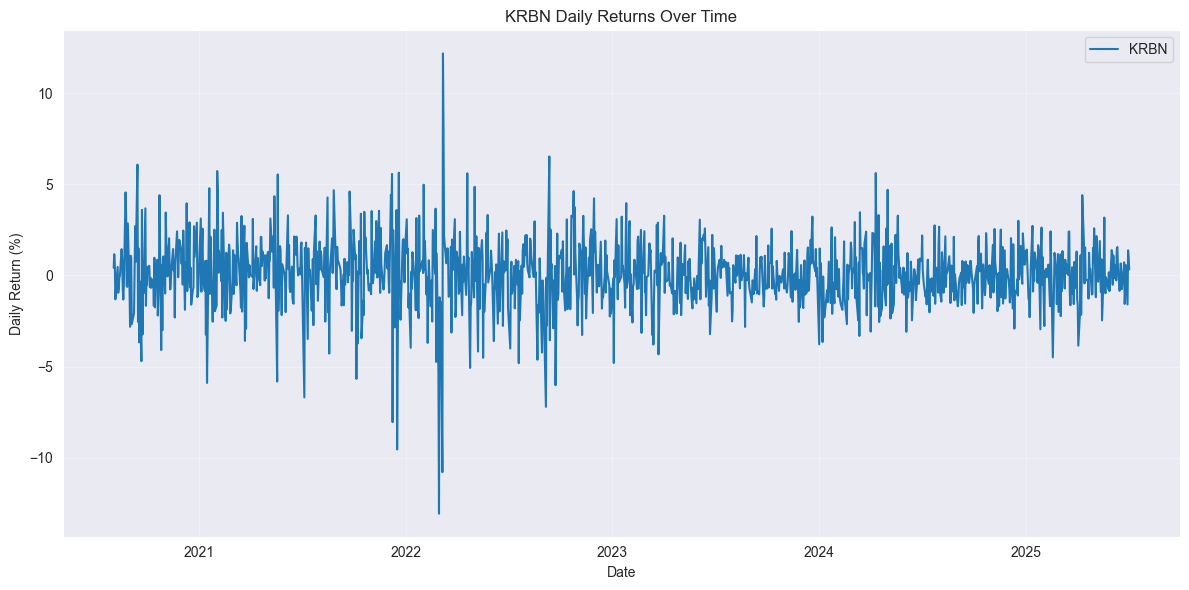

In [54]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')

plt.title("KRBN Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_daily_returns_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

The clear volatility clustering pattern suggests GARCH effects are present in carbon markets, similar to other financial assets.

https://www.sciencedirect.com/science/article/abs/pii/S026499932400333X

The moderation in daily ranges since 2023 might indicate market maturation or could reflect the temporary calm before the next major policy reform (EU ETS Phase V discussions).

Plot saved to plots\krbn\KRBN_rolling_volatility_plot.png


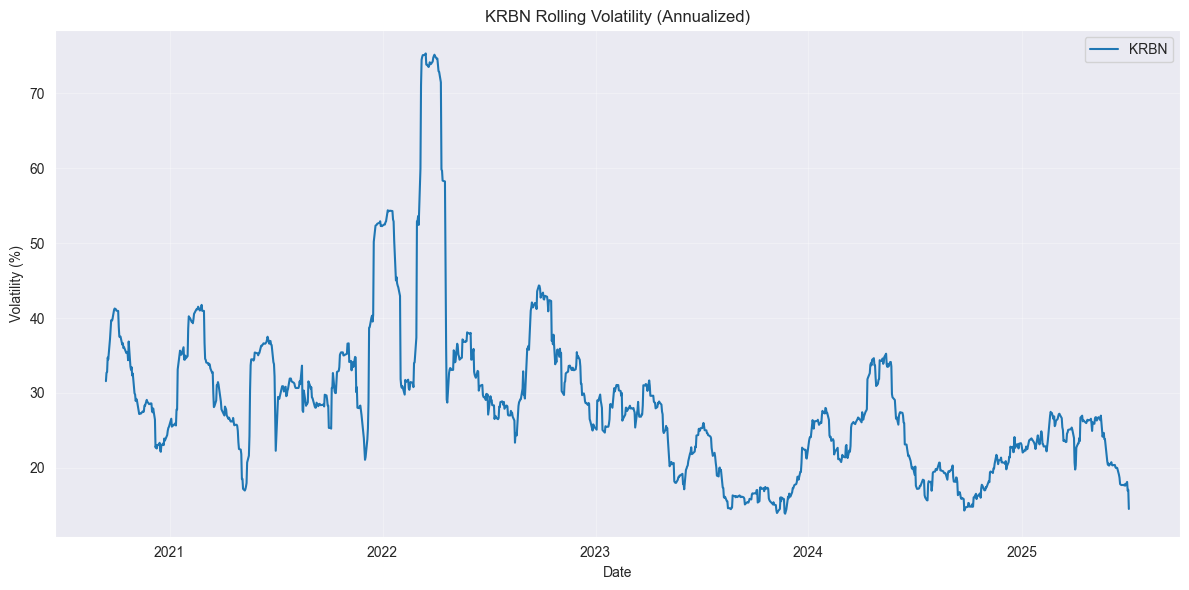

In [55]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'].rolling(window=30).std() * np.sqrt(252), label='KRBN')

plt.title("KRBN Rolling Volatility (Annualized)")
plt.xlabel('Date')
plt.ylabel('Volatility (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_rolling_volatility_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\carbon_vs_assets_weekly_returns_comparison_plot.png


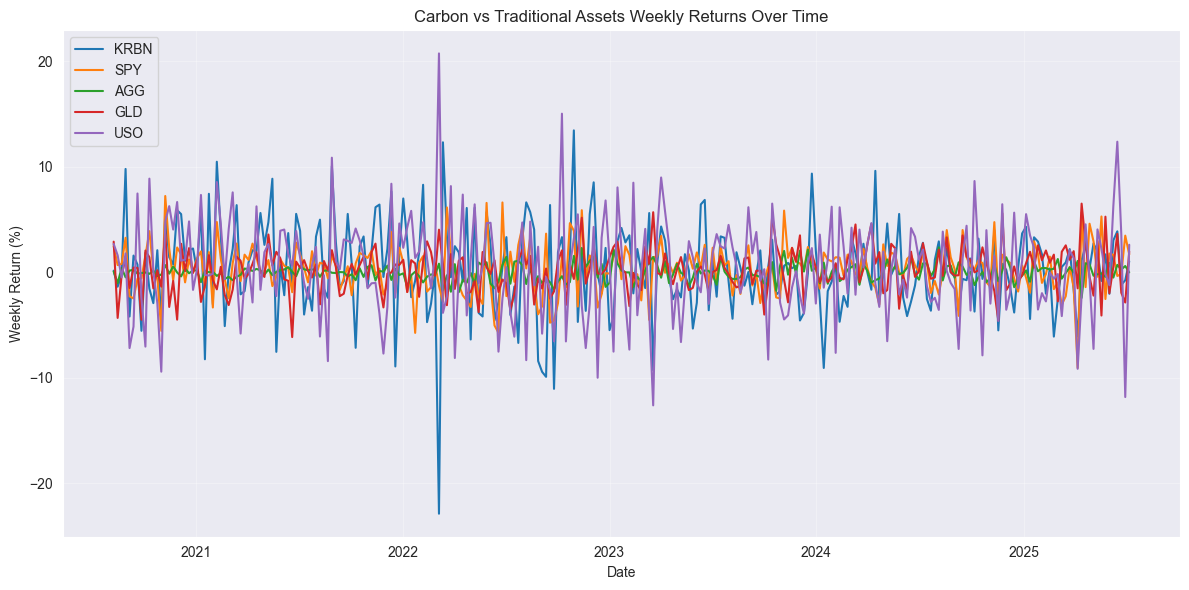

In [56]:
weekly_asset_prices = asset_prices.resample('W').last()
asset_log_returns = weekly_asset_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(asset_log_returns.index, asset_log_returns['KRBN'], label='KRBN')
plt.plot(asset_log_returns.index, asset_log_returns['SPY'], label='SPY')
plt.plot(asset_log_returns.index, asset_log_returns['AGG'], label='AGG')
plt.plot(asset_log_returns.index, asset_log_returns['GLD'], label='GLD')
plt.plot(asset_log_returns.index, asset_log_returns['USO'], label='USO')

plt.title("Carbon vs Traditional Assets Weekly Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Weekly Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_assets_weekly_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [194]:
correlation_matrix = asset_returns.corr(method='kendall')

print(correlation_matrix.round(3))

       KRBN    SPY    AGG    GLD    USO
KRBN  1.000  0.141  0.008  0.071  0.082
SPY   0.141  1.000  0.114  0.085  0.115
AGG   0.008  0.114  1.000  0.232 -0.072
GLD   0.071  0.085  0.232  1.000  0.118
USO   0.082  0.115 -0.072  0.118  1.000


Plot saved to plots\krbn\carbon_assets_correlation_matrix.png


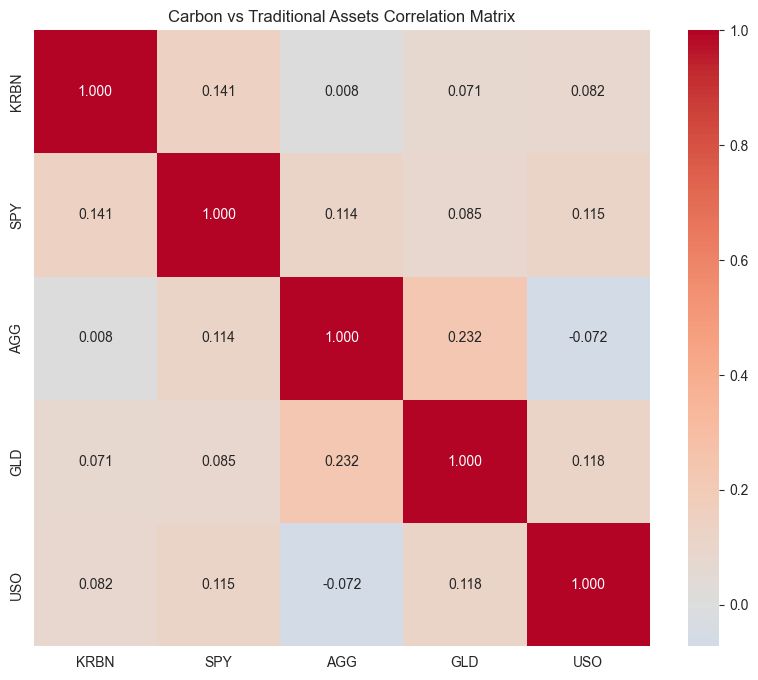

In [195]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Carbon vs Traditional Assets Correlation Matrix')

plot_path = os.path.join(krbn_plots, 'carbon_assets_correlation_matrix.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

The correlation is extremely low. If the comparison to other commodites made sense, then it actually means that KRBN provides amazing diversification potential.

Plot saved to plots\krbn\carbon_rolling_correlation_plot.png


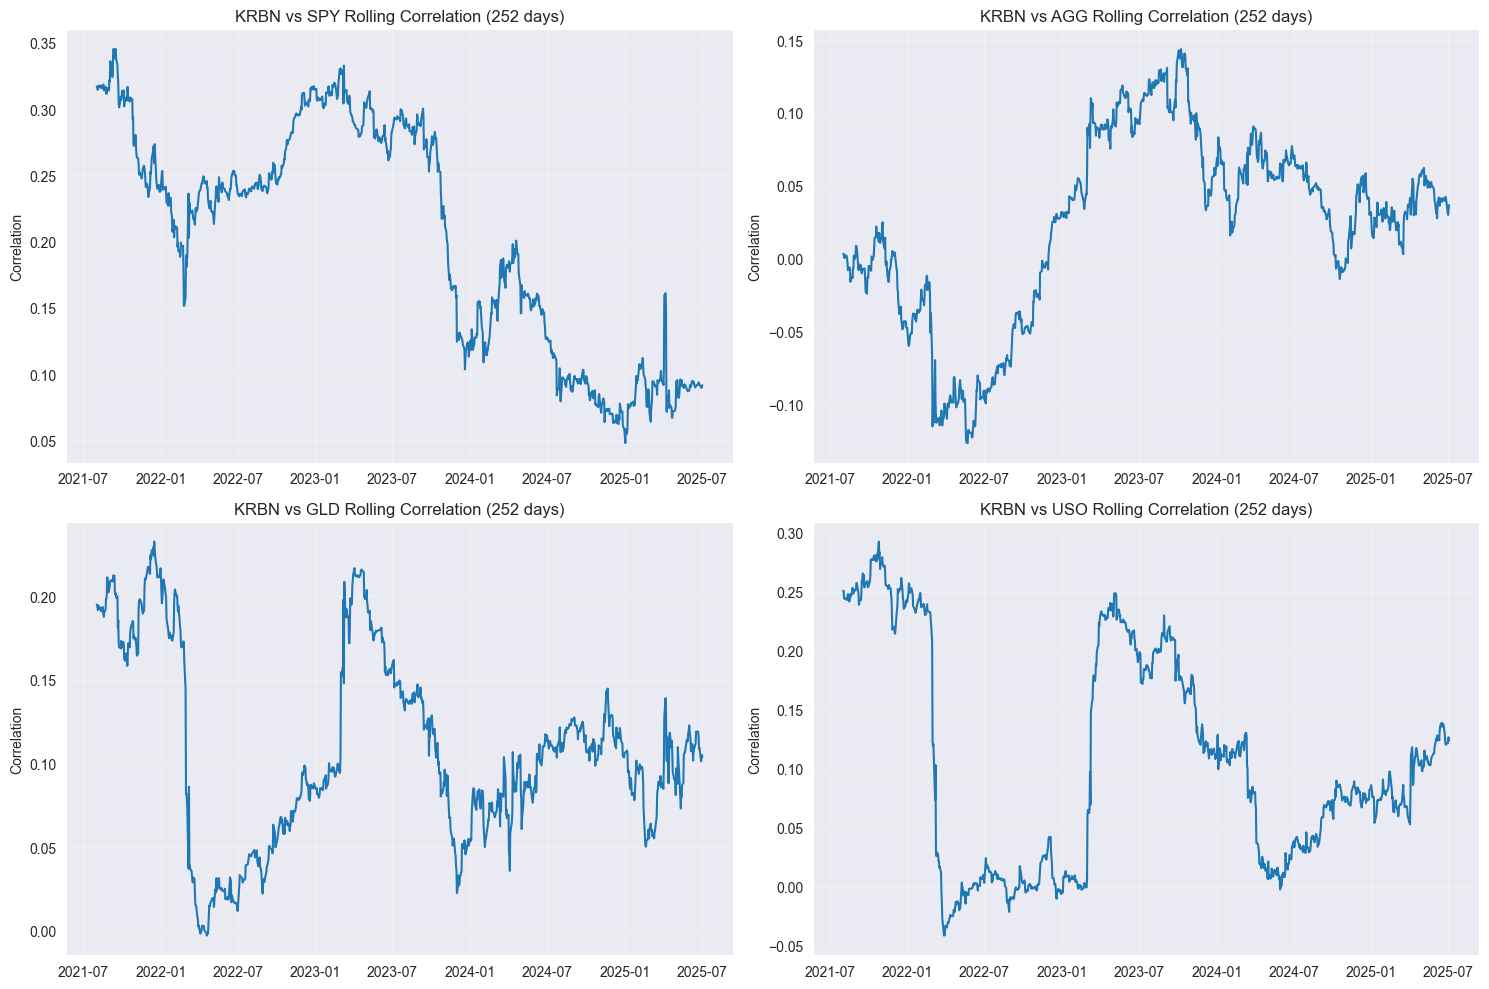

In [59]:
window = 252
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

benchmarks = ['SPY', 'AGG', 'GLD', 'USO']
for i, benchmark in enumerate(benchmarks):
    row, col = i // 2, i % 2
    rolling_corr = asset_returns['KRBN'].rolling(window).corr(asset_returns[benchmark])
    axes[row, col].plot(rolling_corr.index, rolling_corr.values)
    axes[row, col].set_title(f'KRBN vs {benchmark} Rolling Correlation ({window} days)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_ylabel('Correlation')

plot_path = os.path.join(krbn_plots, 'carbon_rolling_correlation_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.tight_layout()
plt.show()

While KRBN doesn't correlate with broad markets, there might be interesting relationships with clean tech innovation indices that aren't captured in current analysis.

In [191]:
results = {}

for asset in asset_returns.columns:
    returns = asset_returns[asset]
    results[asset] = {
        'Annual_Volatility': returns.std() * np.sqrt(252),
        'Daily_Volatility': returns.std(),
        'Annual_Return': returns.mean() * 252,
        'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252),
        'Skewness': stats.skew(returns),
        'Kurtosis': stats.kurtosis(returns),
        'VaR_5%': returns.quantile(0.05),
        'CVaR_5%': returns[returns <= returns.quantile(0.05)].mean(),
        'Max_Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
    }

pd.DataFrame(results).T

,Annual_Volatility,Daily_Volatility,Annual_Return,Sharpe_Ratio,Skewness,Kurtosis,VaR_5%,CVaR_5%,Max_Drawdown
KRBN,30.059790,1.893589,19.931418,0.663059,-0.335386,5.262820,-2.768106,-4.344818,-43.122585
SPY,17.614973,1.109639,16.255360,0.922815,0.229600,8.165431,-1.709506,-2.563744,-25.814103
AGG,6.060674,0.381787,-1.017540,-0.167892,0.091492,1.652075,-0.613046,-0.842447,-20.045405
GLD,15.446126,0.973014,11.484237,0.743503,-0.257202,1.838519,-1.575716,-2.207938,-23.049072
USO,33.839525,2.131690,25.142287,0.742986,-0.469268,2.145195,-3.352561,-4.948392,-39.535885


In [61]:
events = {
    '2020-03-12': 'COVID-19',
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-06-15': 'Fed 75bp Hike',
    '2023-03-10': 'SVB Collapse',
    '2019-12-11': 'EU Green Deal',
    '2021-07-14': 'EU Fit for 55',  # Major EU climate policy
    '2023-02-28': 'Green Bond Standard',
}

event_colors = {
    'COVID-19': 'red',
    'Russia Invades Ukraine': 'red',
    'Fed 75bp Hike': 'purple',
    'SVB Collapse': 'orange',
    'EU Green Deal': 'green',
    'EU Fit for 55': 'green',
    'Green Bond Standard': 'green',
}

event_dates = pd.to_datetime(list(events.keys()))
event_labels = list(events.values())

Price plot saved to plots\krbn\krbn_price_with_events.png


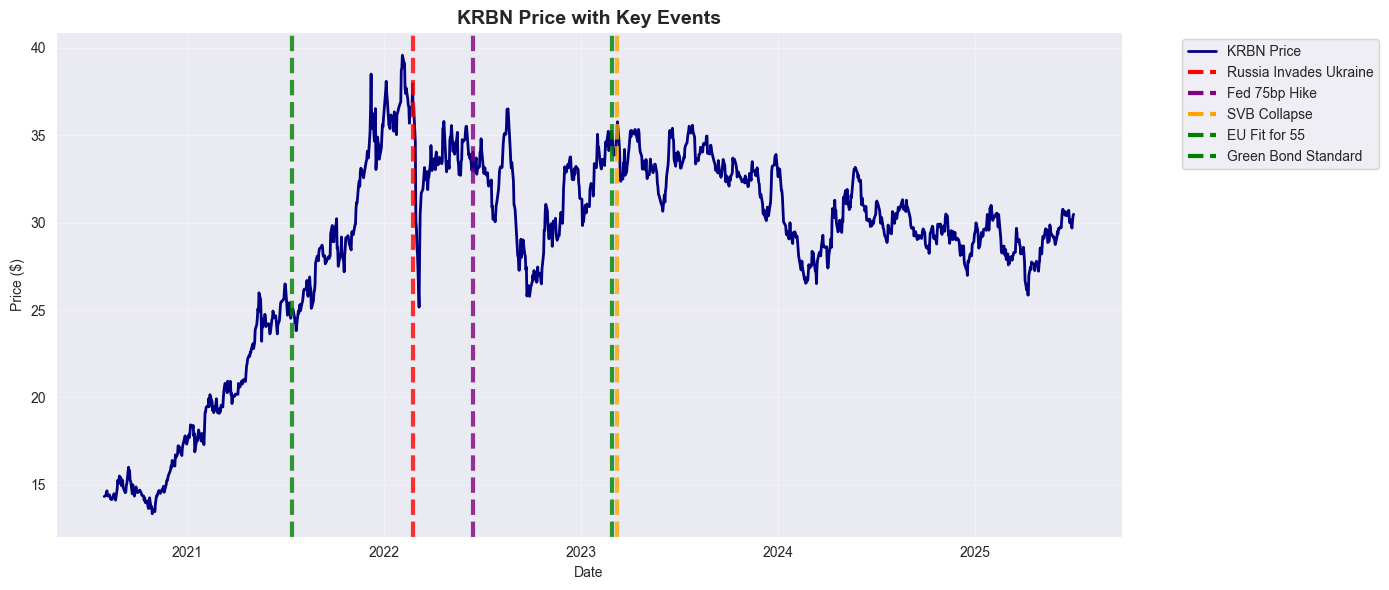

In [62]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(krbn.index, krbn[price_col], label='KRBN Price', color='navy', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= krbn.index[0] and date <= krbn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("KRBN Price with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Price ($)")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='navy', linewidth=2, label='KRBN Price')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_price = os.path.join(krbn_plots, 'krbn_price_with_events.png')
plt.savefig(plot_path_price)
print(f"Price plot saved to {plot_path_price}")

plt.tight_layout()
plt.show()

Strong responses to Russia-Ukraine and SVB suggest carbon markets aren't completely insulated from financial system stress, but reactions are shorter-lived than in traditional assets.

Volatility plot saved to plots\krbn\krbn_rolling_volatility_with_events.png


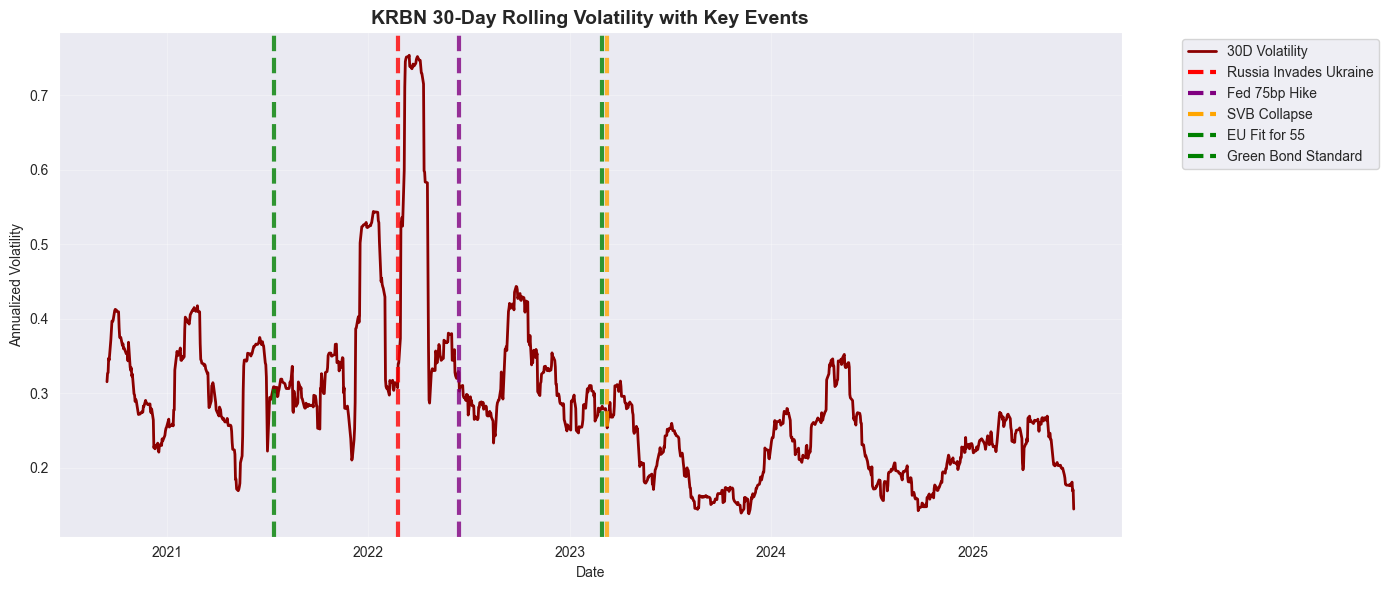

In [63]:
daily_returns = krbn[price_col].pct_change()
rolling_vol = daily_returns.rolling(30).std() * (252 ** 0.5)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(krbn.index, rolling_vol, label='30D Volatility', color='darkred', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= krbn.index[0] and date <= krbn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("KRBN 30-Day Rolling Volatility with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Annualized Volatility")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='darkred', linewidth=2, label='30D Volatility')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_vol = os.path.join(krbn_plots, 'krbn_rolling_volatility_with_events.png')
plt.savefig(plot_path_vol)
print(f"Volatility plot saved to {plot_path_vol}")

plt.tight_layout()
plt.show()

**TODO** list

1. Finish the analysis of the green assets.
2. Look through a diploma project and add additional metrics for comparison like Hurst exponent.
3. Outline some ideas with policy impact tracking. And try to facilitate them.
4. Think about doing regime analysis by picking up the starting point and performing analysis further on.
5. Enhance diversification analysis by adding comparison with other commodities.
5. Add google trends integration.
6. Investigate the spillover effects.
7. Do cross-asset correlation analysis (bonds vs. stocks vs. commodities).
8. Try factor exposure analysis by comparing climate and finance factors.

**Regarding AI predictive models**

1. Look through different models like BEKK, GARCH, TACTiS-2, S-Mamba etc.
2. Choose accuracy evaluation metrics like RMSE, AME, R^2.

**Q/A**

1. Why does it make sense to compare carbon allowances with other commodities?
2. Should I include other metrics to the analysis like liquidity to prove or disprove statement regarding niche status of green assets?
3. Should I include computations of Hurst exponent or any other additional metric?
4. Should I change plots in any aspect?
5. Should I add plots with copulas visualization?

1. Selecet the graphs that can tell something.
2. Try to answer the initial question.
3.